# CogVideoX

`CogVideoX` is a text-to-video generation model focused on creating more coherent videos aligned with a prompt.

`CogVideoX` has
* a 3D VAE compressing videos spatially and temporally, improving compression rate and video accuracy.
* an expert transformer block helping align text and video,
* a 3D full attention module for capturing and creating spatially and temporally accurate videos

## Text-to-Video

In [ ]:
from diffusers import CogVideoXPipeline
from diffusers.utils import export_to_video
import torch

pipe = CogVideoXPipeline.from_pretrained(
    'THUDM/CogVideoX-5b',
    torch_dtype=torch.float16,
)
pipe.enable_model_cpu_offload()
pipe.vae.enable_tiling()

In [ ]:
prompt = """An elderly gentleman, with a serene expression, sits at the water's edge, a steaming cup of tea by his side.
He is engrossed in his artwork, brush in hand, as he renders an oil painting on a canvas that's propped up against a small, weathered table.
The sea breeze whispers through his silver hair, gently billowing his loose-fitting white shirt, while the salty air adds an intangible element to his masterpiece in progress.
The scene is one of tranquility and inspiration, with the artist's canvas capturing the vibrant hues of the setting sun reflecting off the tranquil sea."""

video = pipe(
    prompt,
    num_videos_per_prompt=1,
    num_inference_steps=50,
    num_frames=49,
    guidance_scale=6,
    generator=torch.Generator('cuda').manual_seed(111)
).frames[0]
export_to_video(video, 'output.mp4', fps=8)

## Image-to-Video

In [ ]:
from diffusers import CogVideoXImageToVideoPipeline
from diffusers.utils import export_to_video, load_image
import torch

pipe = CogVideoXImageToVideoPipeline.from_pretrained(
    'THUDM/CogVideoX-5b-I2V',
    torch_dtype=torch.float16
)
pipe.vae.enable_tiling()
pipe.vae.enable_slicing()

In [2]:
from diffusers import CogVideoXImageToVideoPipeline
from diffusers.utils import export_to_video, load_image
import torch

In [3]:
prompt = """A vast, shimmering ocean flows gracefully under a twilight sky, its waves undulating in a mesmerizing dance of blues and greens.
The surface glints with the last rays of the setting sun, casting golden highlights that ripple across the water.
Seagulls soar above, their cries blending with the gentle roar of the waves.
The horizon stretches infinitely, where the ocean meets the sky in a seamless blend of hues.
Close-ups reveal the intricate patterns of the waves, capturing the fluidity and dynamic beauty of the sea in motion."""
image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/cogvideox/cogvideox_rocket.png")

video = pipe(
    prompt,
    image=image,
    num_videos_per_prompt=1,
    num_inference_steps=50,
    num_frames=49,
    guidance_scale=6,
    generator=torch.Generator('cuda').manual_seed(111)
).frames[0]

export_to_video(video, 'output.mp4', fps=8)

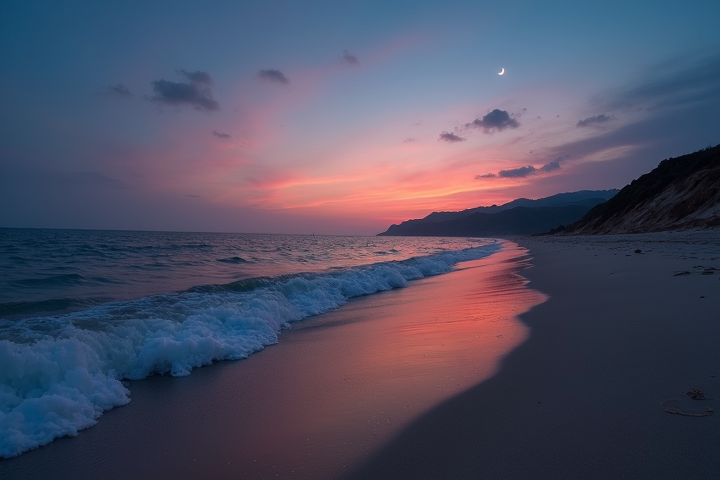

In [4]:
image